In [76]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

### Maths Servers:

In [77]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.data_wrangling as data 

# import dataset for maths servers
# ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc',
#                             parallel=True, chunks={'time': 31})

ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                            parallel=True, chunks={'time': 31})

ds = data.seasonal_mean(ds, season='djf')
ds = data.check_dimensions(ds, ignore_dim='lon')
ds 

<xarray.Dataset>
Dimensions:  (time: 58, level: 22, lat: 73)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    ubar     (time, level, lat) float32 3.844e-05 -2.151 ... 5.874 -5.338e-05
    div1_pr  (time, level, lat) float32 nan nan nan nan nan ... nan nan nan nan
    div1_qg  (time, level, lat) float32 nan nan -1.841e-05 ... 4.341e-05 nan nan

### JASMIN Servers:

In [78]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
# import functions.eddy_feedback as ef 

# # import dataset for JASMIN servers
# ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
#                             parallel=True, chunks={'time': 31})

# ds

# Zonal-mean zonal wind (DJF)

In [79]:
# define zonal mean zonal wind
u = ds.ubar

# slice data at 500hPA and set EFP boundaries
u = u.sel( level = 500. )
u = u.where( ds.lat >= 25., drop=True )
u = u.where( ds.lat <= 75., drop=True )

# flip axes so time on x-axis
u = u.transpose()

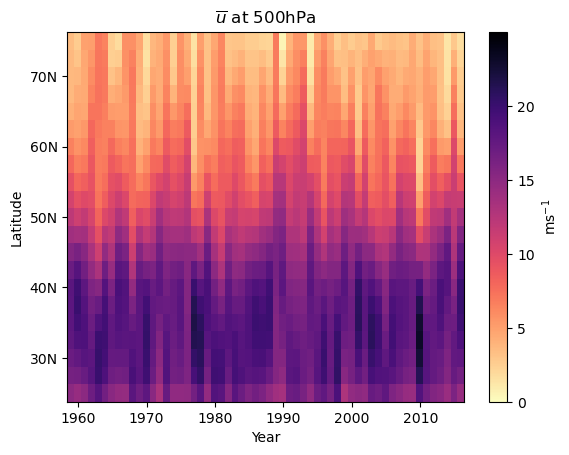

In [80]:
fig, ax = plt.subplots()
u.plot(ax=ax, cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
ax.set_yticks(np.arange(30,80,10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_title('$\\overline{u}$ at 500hPa')
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# DJF Northward EP Flux Divergence

In [81]:
# separate into interannual means
# div1 = ds.div1_pr / 86400 
div1 = ds.div1_pr

# slice data at 500hPA and set EFP boundaries
div1 = div1.sel( level = 500. )
div1 = div1.where( ds.lat >= 25., drop=True )
div1 = div1.where( ds.lat <= 75., drop=True )

# flip axes so time on x-axis
div1 = div1.transpose()

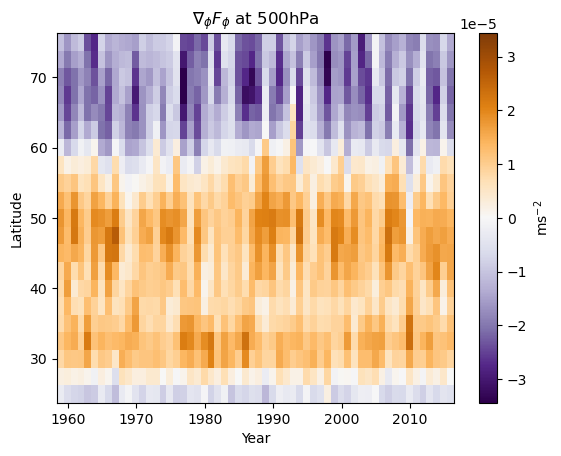

In [82]:
fig, ax = plt.subplots()
div1.plot(ax=ax, cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
ax.set_title('$\\nabla_\\phi F_\\phi$ at 500hPa')
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# Plot both Figures

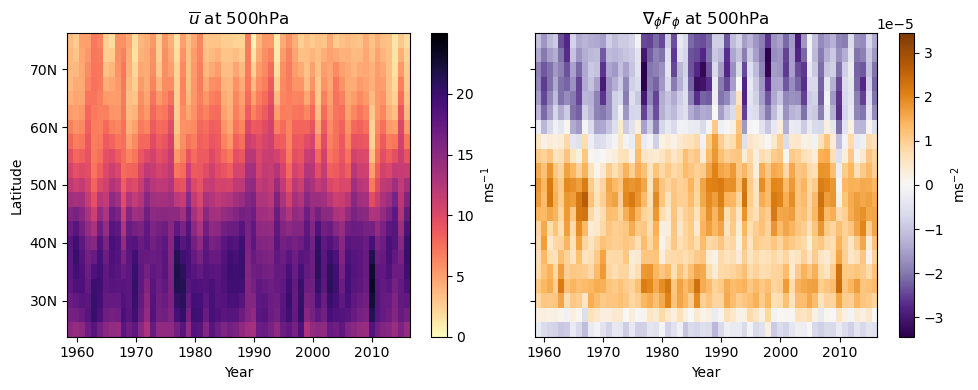

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))

# plot ubar 
u.plot(ax=ax1, cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
ax1.set_yticks(np.arange(30,80, 10))
ax1.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax1.set_title('$\\overline{u}$ at 500hPa')
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Year')


# plot div1 
div1.plot(ax=ax2, cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
ax2.set_title('$\\nabla_\\phi F_\\phi$ at 500hPa')
ax2.set_ylabel('')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

# Covariance

In [84]:
uanom = (u- u.mean('time'))
div1anom = (div1- div1.mean('time') )

prod = uanom*div1anom

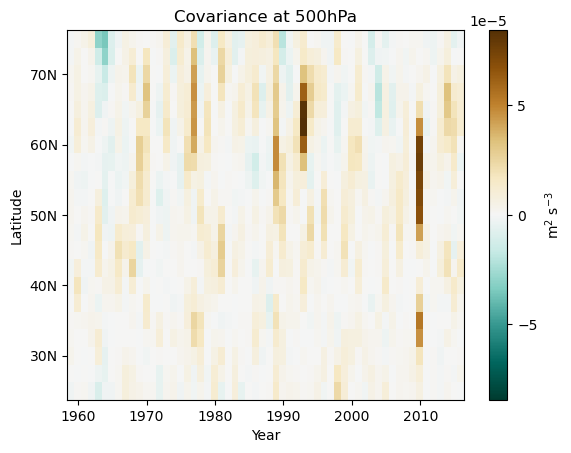

In [85]:
fig, ax = plt.subplots()
prod.plot(ax=ax, cmap='BrBG_r', cbar_kwargs={'label': 'm$^2$ s$^{-3}$', 'ticks':[-5e-5,0,5e-5]})
ax.set_title('Covariance at 500hPa')
ax.set_yticks(np.arange(30,80, 10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

# Correlation

In [86]:
ustd = u.std()
div1std = div1.std()

corr = prod / (ustd * div1std)


In [87]:
# somehow greater than 1????
corr = corr.where( corr < 1)
corr = corr.fillna(1)

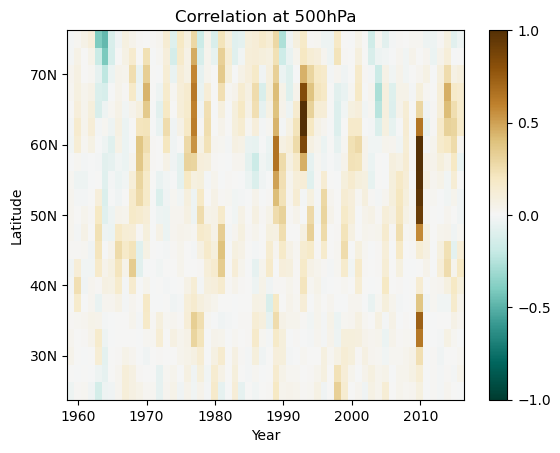

In [88]:
fig, ax = plt.subplots()
corr.plot(ax=ax, cmap='BrBG_r', vmin=-1., vmax=1,
          cbar_kwargs={'ticks':[-1,-0.5,0,0.5,1]}) 
ax.set_title('Correlation at 500hPa')
ax.set_yticks(np.arange(30,80, 10))
ax.set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
ax.set_ylabel('Latitude')
ax.set_xlabel('Year')
plt.show()

In [89]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc',
                            parallel=True, chunks={'time': 31})
ds = data.seasonal_mean(ds, season='djf')

ds = ds.sel(level=500.)
ds = ds.sel(lat=slice(75,25))

corr2 = xr.corr(ds.ubar, ds.div1_pr, dim='time')

corr2 

<xarray.DataArray (lat: 21)>
array([0.07031977, 0.1853515 , 0.38438977, 0.52661199, 0.61873062,
       0.6799046 , 0.67271276, 0.53163189, 0.46594259, 0.53724347,
       0.608136  , 0.63372676, 0.65194019, 0.66299662, 0.60090824,
       0.45050579, 0.60113733, 0.62875861, 0.51227443, 0.5174483 ,
       0.4308421 ])
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 35.0 32.5 30.0 27.5 25.0
    level    float64 500.0

# Plot all figures

In [90]:
inches = 1/25.4 
figsize = (230*inches, 130*inches)
print(figsize)

# figsize = (10,8)

(9.05511811023622, 5.118110236220472)


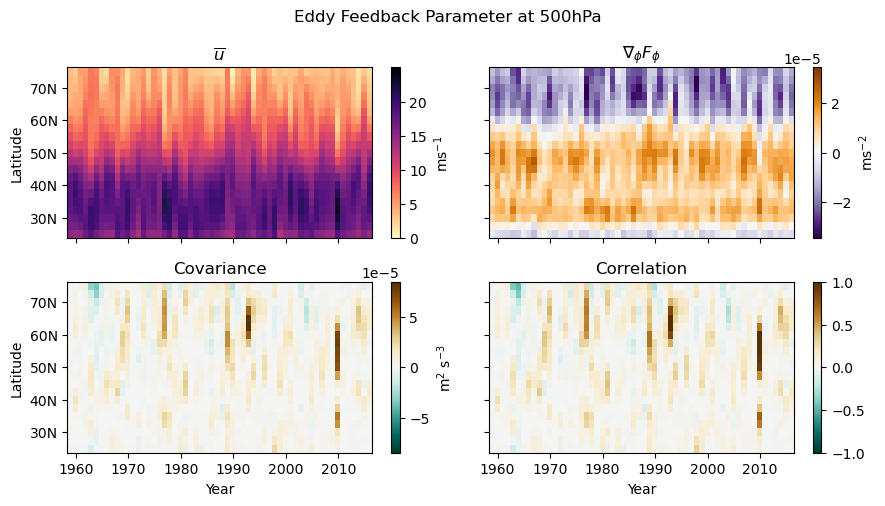

In [94]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=figsize)

# plot ubar
u.plot(ax=axs[0,0], cmap='magma_r', vmin=0, vmax=25,
       cbar_kwargs={'label': 'ms$^{-1}$', 'ticks':[0, 5, 10, 15, 20]})
axs[0,0].set_yticks(np.arange(30,80, 10))
axs[0,0].set_yticklabels(['30N', '40N', '50N', '60N', '70N'])
axs[0,0].set_title('$\\overline{u}$')
axs[0,0].set_ylabel('Latitude')
axs[0,0].set_xlabel('')


# plot div1
div1.plot(ax=axs[0,1], cmap='PuOr_r',
       cbar_kwargs={'label': 'ms$^{-2}$'})
axs[0,1].set_title('$\\nabla_\\phi F_\\phi$')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')

# plot covariance
prod.plot(ax=axs[1,0], cmap='BrBG_r', cbar_kwargs={'label': 'm$^2$ s$^{-3}$', 'ticks':[-5e-5,0,5e-5]})
axs[1,0].set_title('Covariance')
axs[1,0].set_ylabel('Latitude')
axs[1,0].set_xlabel('Year')

# plot correlation
corr.plot(ax=axs[1,1], cmap='BrBG_r', vmin=-1., vmax=1.,
          cbar_kwargs={'ticks':[-1,-0.5,0,0.5,1]})
axs[1,1].set_title('Correlation')
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('Year')

fig.suptitle('Eddy Feedback Parameter at 500hPa')

plt.tight_layout()
plt.show()